In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets

import pennylane as qml
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
import sklearn.decomposition

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles

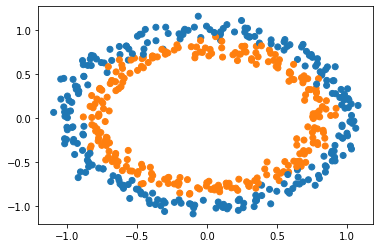

In [3]:
np.random.seed(42)
tf.random.set_seed(42)

X, y = make_circles(n_samples=500, noise=0.05)
y_hot = tf.keras.utils.to_categorical(y, num_classes=2)  

c = ["#1f77b4" if y_ == 0 else "#ff7f0e" for y_ in y] 
plt.scatter(X[:, 0], X[:, 1], c=c)
plt.show()

In [4]:
import pennylane as qml

n_qubits = 4
dev = qml.device("default.qubit", wires=n_qubits)

@qml.qnode(dev)
def qnode(inputs, weights):
    qml.templates.AngleEmbedding(inputs, wires=range(n_qubits))
    qml.templates.StronglyEntanglingLayers(weights, wires=range(n_qubits))
    return [qml.expval(qml.PauliZ(wires=i)) for i in range(n_qubits)]

In [5]:
n_layers = 1
weight_shapes = {"weights": (n_layers, n_qubits, 3)}
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(n_qubits,activation='relu',input_dim=2))
model.add(qml.qnn.KerasLayer(qnode, weight_shapes, output_dim=n_qubits))
model.add(tf.keras.layers.Dense(2, activation='softmax'))

opt = tf.keras.optimizers.Adam(learning_rate=0.01)
model.compile(loss='categorical_crossentropy', optimizer=opt,metrics=["accuracy"])

In [6]:
history = model.fit(X, y_hot, validation_data=(X, y_hot), epochs=30, batch_size=5)

Epoch 1/30
100/100 [==============================] - 44s 437ms/step - loss: 0.7340 - accuracy: 0.5290 - val_loss: 0.6911 - val_accuracy: 0.4980
Epoch 2/30
100/100 [==============================] - 43s 436ms/step - loss: 0.6951 - accuracy: 0.5000 - val_loss: 0.6830 - val_accuracy: 0.6180
Epoch 3/30
100/100 [==============================] - 43s 434ms/step - loss: 0.6850 - accuracy: 0.5634 - val_loss: 0.6725 - val_accuracy: 0.6440
Epoch 4/30
100/100 [==============================] - 43s 435ms/step - loss: 0.6742 - accuracy: 0.5813 - val_loss: 0.6601 - val_accuracy: 0.5480
Epoch 5/30
100/100 [==============================] - 43s 434ms/step - loss: 0.6569 - accuracy: 0.6248 - val_loss: 0.6176 - val_accuracy: 0.7660
Epoch 6/30
100/100 [==============================] - 43s 434ms/step - loss: 0.6218 - accuracy: 0.6888 - val_loss: 0.5818 - val_accuracy: 0.7620
Epoch 7/30
100/100 [==============================] - 43s 435ms/step - loss: 0.6002 - accuracy: 0.7059 - val_loss: 0.5593 - val_ac

In [7]:
print(qnode.draw())

 0: ──RX(2.22)──Rot(1.57, -2.89, -0.768)──────────╭C──────────╭X──┤ ⟨Z⟩ 
 1: ──RX(0)─────Rot(4.63e-05, -2.82e-05, 0.0906)──╰X──╭C──────│───┤ ⟨Z⟩ 
 2: ──RX(0.18)──Rot(0.000326, 0.000411, 0.698)────────╰X──╭C──│───┤ ⟨Z⟩ 
 3: ──RX(0)─────Rot(-1.68e-08, 5.1e-09, -0.825)───────────╰X──╰C──┤ ⟨Z⟩ 



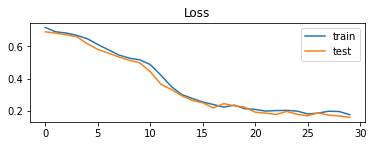

In [8]:
from matplotlib import pyplot
# plot loss during training
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

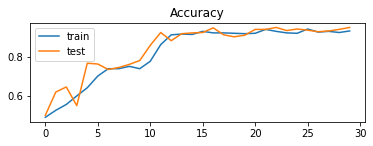

In [9]:
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()

In [10]:
predy = model.predict(X)

In [11]:
rounded_labels_pred=np.argmax(predy, axis=1)
rounded_labels_pred

array([1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,

In [12]:
rounded_labels_real = np.argmax(y_hot , axis=1)
rounded_labels_real

array([1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,

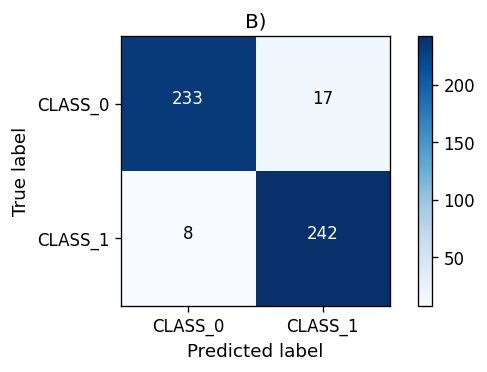

In [19]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(rounded_labels_real, rounded_labels_pred)

import numpy as np


def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    fig = plt.figure(figsize=(5, 3), dpi=120)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label', fontsize=11)
    plt.xlabel('Predicted label', fontsize=11)
    plt.show()
    return fig
fig = plot_confusion_matrix(cm, 
                      normalize    = False,
                      target_names = ['CLASS_0', 'CLASS_1'],
                      title        = "B)")

In [22]:
colours_prediction = {"correct": "#00A0B0", "incorrect": "#CC333F"}
markers = ["o", "v"]


def plot_points_prediction(x, y, p):
    c = {0: [], 1: [], 2: []}
    x_ = {0: [], 1: [], 2: []}

    for i in range(500):
        x_[y[i]].append(x[i])
        if p[i] == y[i]:
            c[y[i]].append(colours_prediction["correct"])
        else:
            c[y[i]].append(colours_prediction["incorrect"])
    fig = plt.figure(figsize=(5,5), dpi=100) 
    for i in range(2):
        x_class = np.array(x_[i])
        plt.scatter(x_class[:, 0], x_class[:, 1], c=c[i], marker=markers[i])
        
    plt.xlabel("Feature 1", fontsize=11)
    plt.ylabel("Feature 2", fontsize=11)
    plt.title("A)")
    plt.grid()
    
    ax = plt.gca()
    ax.set_aspect(1)
    c_transparent = "#00000000"

    custom_lines = [
        Patch(
            facecolor=colours_prediction["correct"],
            edgecolor=c_transparent, label="Correct"
        ),
        Patch(
            facecolor=colours_prediction["incorrect"],
            edgecolor=c_transparent, label="Incorrect"
        ),
        Line2D([0], [0], marker=markers[0], color=c_transparent, label="Class_0",
               markerfacecolor="black", markersize=10),
        Line2D([0], [0], marker=markers[1], color=c_transparent, label="Class_1",
               markerfacecolor="black", markersize=10),
    ]

    ax.legend(handles=custom_lines)
    return fig

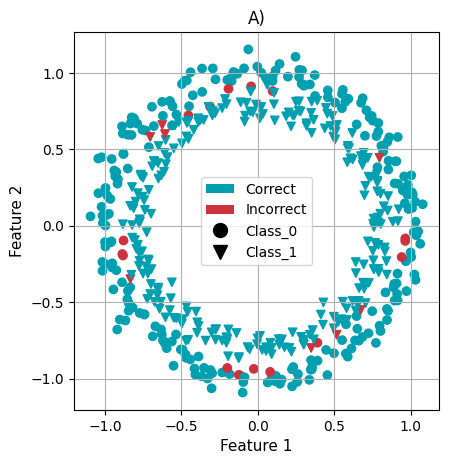

In [23]:
fig = plot_points_prediction(X, rounded_labels_real, rounded_labels_pred)